# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".

data = np.loadtxt("https://raw.githubusercontent.com/gaurav639/ML_Plaksha_CSVs/main/data.csv", delimiter=',', skiprows=1)
print(data)

[[  51.87   79.72 1249.99]
 [ -30.66  -15.64 -516.61]
 [ -57.57   94.22  312.09]
 ...
 [ -18.6    32.61  -45.14]
 [ -38.31   77.81  -20.13]
 [ -38.33   45.69 -460.47]]


## 2. Plot and explore the data to get a better understanding

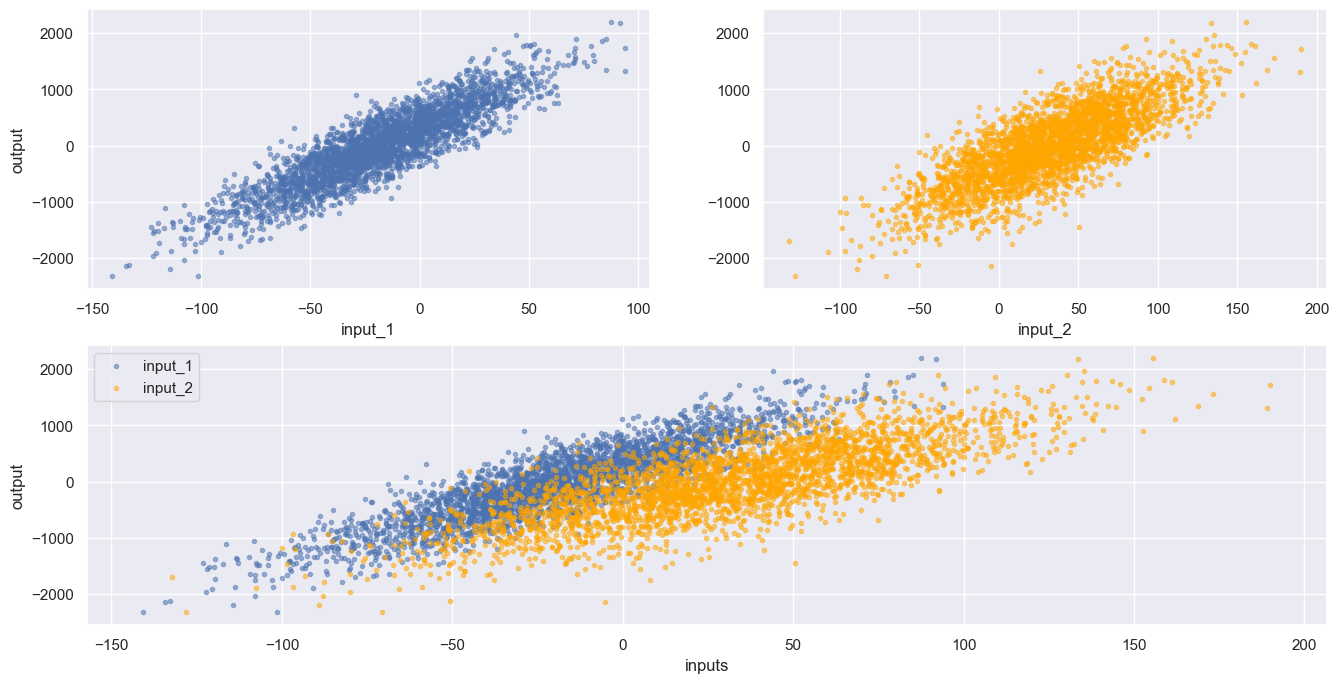

In [71]:
# EDA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, 0])
ax.scatter(data[:,0], data[:,2], marker='.', alpha = 0.5)
ax.set_xlabel('input_1')
ax.set_ylabel('output')

ax = fig.add_subplot(gs[0, 1])
ax.scatter(data[:,1], data[:,2], marker='.', alpha = 0.5, color = 'orange')
ax.set_xlabel('input_2')

ax = fig.add_subplot(gs[1,:])
ax.scatter(data[:,0], data[:,2], marker='.', alpha = 0.5)
ax.scatter(data[:,1], data[:,2], marker='.', alpha = 0.5, color = 'orange')
ax.set_xlabel('inputs')
ax.set_ylabel('output')
ax.legend(['input_1','input_2'])

plt.show()



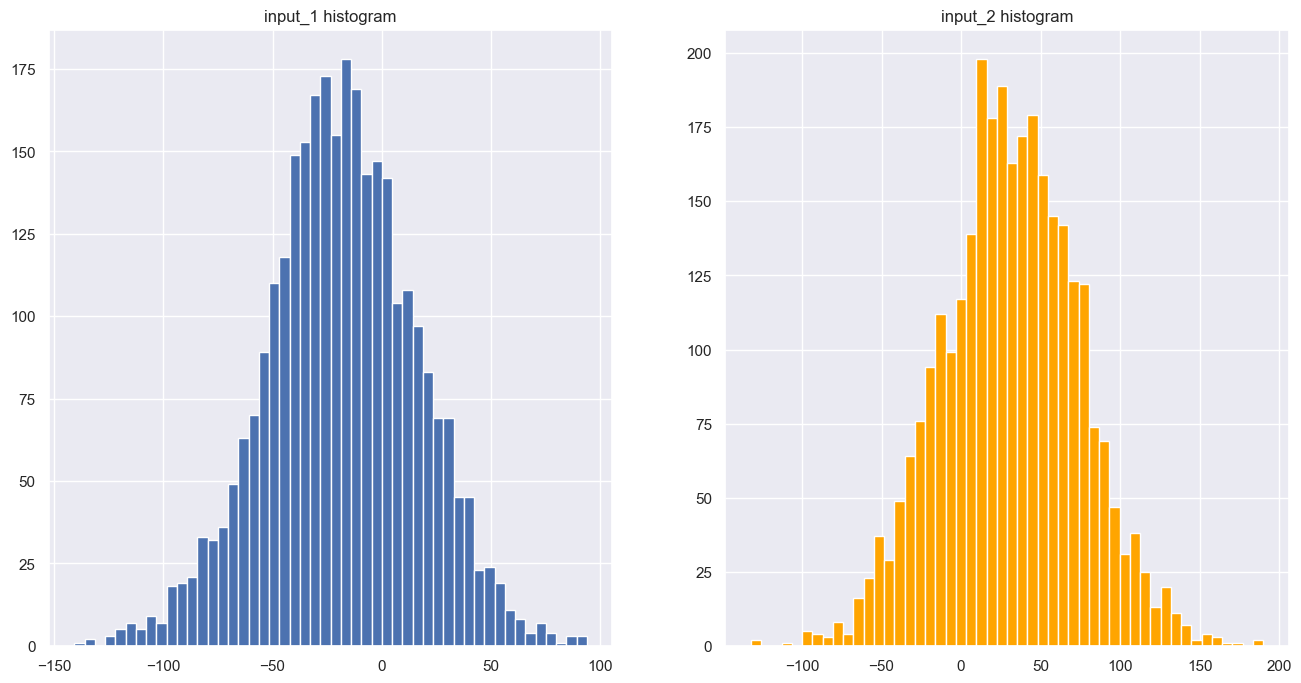

In [72]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2)

ax = fig.add_subplot(gs[0, 0])
ax.hist(data[:,0], bins = 50)
ax.set_title('input_1 histogram')

ax = fig.add_subplot(gs[0, 1])
ax.hist(data[:,1], color='orange', bins = 50)
ax.set_title('input_2 histogram')

plt.show()

Both of the inputs are having normal distribution of data points.

## 3. Prepare the data for modelling

In [73]:
# Separate the data: input and output.
input = data[:, 0:2]
output = data[:,2]
print(input)
print(output)

[[ 51.87  79.72]
 [-30.66 -15.64]
 [-57.57  94.22]
 ...
 [-18.6   32.61]
 [-38.31  77.81]
 [-38.33  45.69]]
[1249.99 -516.61  312.09 ...  -45.14  -20.13 -460.47]


In [74]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 

from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(input, output, train_size=0.6, random_state=42)

x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, train_size=0.5, random_state=42)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


Here stratified sampling is not necessary as we use stratified sampling when we have to take equal proportion of given classes in both train and test data set but here there are no classes.

## 4. Modelling

### 4.1 Linear Regression

In [75]:
# Use both train and val data for training purpose.
X = np.concatenate((x_train, x_valid), axis=0)
Y = np.concatenate((y_train, y_valid), axis = 0)

# Implement Linear Regression.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,Y)

# Make preditions on both training(train+val) and test data.
y_pred_train_lr = lr.predict(X)
y_pred_test_lr = lr.predict(x_test)

### 4.2 Ridge Regression

In [76]:
# Implement Ridge Regression.
from sklearn.linear_model import Ridge

# Perform cross validation to find a good value for your hyper-parameter.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[i for i in range(1, 1001)]}

model_1 = Ridge()

Ridge_reg= GridSearchCV(model_1, parameters, cv=5)

Ridge_reg.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, 30, ...]})

In [77]:
import pandas as pd
df = pd.DataFrame(Ridge_reg.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001749,0.003498,0.000151,0.000301,1,{'alpha': 1},0.940317,0.947068,0.950278,0.950353,0.947567,0.947117,0.003658,345
1,0.001403,0.002806,0.000000,0.000000,2,{'alpha': 2},0.940317,0.947068,0.950278,0.950353,0.947567,0.947117,0.003658,343
2,0.001633,0.003265,0.000000,0.000000,3,{'alpha': 3},0.940317,0.947068,0.950278,0.950353,0.947567,0.947117,0.003658,341
3,0.000000,0.000000,0.000000,0.000000,4,{'alpha': 4},0.940317,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,339
4,0.000000,0.000000,0.000000,0.000000,5,{'alpha': 5},0.940317,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,996,{'alpha': 996},0.940328,0.947064,0.950271,0.950353,0.947567,0.947117,0.003653,996
996,0.000000,0.000000,0.000705,0.001409,997,{'alpha': 997},0.940328,0.947064,0.950271,0.950353,0.947567,0.947117,0.003653,997
997,0.000000,0.000000,0.000904,0.001807,998,{'alpha': 998},0.940328,0.947064,0.950271,0.950353,0.947567,0.947117,0.003653,998
998,0.000000,0.000000,0.000000,0.000000,999,{'alpha': 999},0.940328,0.947064,0.950271,0.950353,0.947567,0.947117,0.003653,999


In [78]:
Ridge_reg_best_score = Ridge_reg.best_score_

In [79]:
df[df['mean_test_score'] == Ridge_reg_best_score]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
172,0.0,0.0,0.000808,0.001616,173,{'alpha': 173},0.940319,0.947068,0.950276,0.950353,0.947567,0.947117,0.003657,1


In [80]:
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
clf_ridge = Ridge(alpha=173)
clf_ridge.fit(X,Y)

# Make predictions on both training(train+val) and test data.
y_pred_train_ridge = clf_ridge.predict(X)
y_pred_test_ridge = clf_ridge.predict(x_test)


### 4.3 Lasso Regression

In [81]:
# Implement Lasso Regression.
from sklearn.linear_model import Lasso

# Perform cross validation to find a good value for your hyper-parameter.
parameters_2 = {'alpha': [i/10 for i in range(1,101)]}

model_2 = Lasso()

Lasso_reg= GridSearchCV(model_2, parameters_2, cv=5)

Lasso_reg.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                                   2.8, 2.9, 3.0, ...]})

In [82]:
Lasso_reg_best_score = Lasso_reg.best_score_

In [83]:
df = pd.DataFrame(Lasso_reg.cv_results_)
df[df['mean_test_score'] == Lasso_reg_best_score]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.0,0.0,0.001605,0.00321,1.2,{'alpha': 1.2},0.940319,0.947068,0.950276,0.950353,0.947567,0.947117,0.003657,1


In [84]:
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
clf_Lasso = Lasso(alpha=1.2)
clf_Lasso.fit(X,Y)

# Make predictions on both training(train+val) and test data.
y_pred_train_lasso = clf_Lasso.predict(X)
y_pred_test_lasso = clf_Lasso.predict(x_test)

### 4.4 ElasticNet Regression

In [85]:
# Implement ElasticNet Regression.
from sklearn.linear_model import ElasticNet

# Perform cross validation to find a good value for your hyper-parameters.
model_3 = ElasticNet()

parameters_3 = {'alpha':[i/10 for i in range(1,101)], 'l1_ratio': [i/10 for i in range(1,10)]}

en_reg= GridSearchCV(model_3, parameters_3, cv=5)

en_reg.fit(X,Y)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                                   2.8, 2.9, 3.0, ...],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]})

In [86]:
en_reg_best_score = en_reg.best_score_

In [87]:
df = pd.DataFrame(en_reg.cv_results_)
df[df['mean_test_score'] == en_reg_best_score]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.0016,0.0032,0.0,0.0,0.2,0.4,"{'alpha': 0.2, 'l1_ratio': 0.4}",0.94032,0.947067,0.950276,0.950353,0.947567,0.947117,0.003657,1


In [88]:
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
clf_en = ElasticNet(alpha=0.2, l1_ratio = 0.4)
clf_en.fit(X,Y)

# Make predictions on both training(train+val) and test data.
y_pred_train_en = clf_en.predict(X)
y_pred_test_en = clf_en.predict(x_test)

## 5. Analysis

In [89]:
# Write down the actual value along with the predictions from all the regression models, for the first 10 points in test data.
df = pd.DataFrame(list(zip(y_pred_test_lr[:10], y_pred_test_ridge[:10], y_pred_test_lasso[:10], y_pred_test_en[:10], y_test[:10])),
               columns =['lr', 'ridge','lasso','en','test'])
df

,lr,ridge,lasso,en,test
0,232.929309,232.912453,232.918722,232.901372,280.16
1,-117.439635,-117.414970,-117.437124,-117.399991,-193.86
2,583.259754,583.243645,583.228553,583.231046,619.91
3,-393.335976,-393.288413,-393.321408,-393.258603,-305.45
4,85.216456,85.219796,85.210913,85.221264,-31.10
5,145.938591,145.933548,145.930989,145.929810,280.18
6,-592.569438,-592.546902,-592.538770,-592.530514,-700.85
7,576.334435,576.306821,576.305685,576.287581,747.05
8,-709.495395,-709.459295,-709.460305,-709.434380,-777.72
9,1025.852134,1025.804460,1025.800672,1025.771070,836.78


In [90]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
import math 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

d = {
    'rmse_train' : [math.sqrt(mean_squared_error(Y, y_pred_train_lr)), math.sqrt(mean_squared_error(Y, y_pred_train_ridge)), math.sqrt(mean_squared_error(Y, y_pred_train_lasso)), math.sqrt(mean_squared_error(Y, y_pred_train_en))] ,
    'rmse_test' : [math.sqrt(mean_squared_error(y_test, y_pred_test_lr)), math.sqrt(mean_squared_error(y_test, y_pred_test_ridge)), math.sqrt(mean_squared_error(y_test, y_pred_test_lasso)), math.sqrt(mean_squared_error(y_test, y_pred_test_en))] ,
    'mae_train' : [mean_absolute_error(Y, y_pred_train_lr), mean_absolute_error(Y, y_pred_train_ridge), mean_absolute_error(Y, y_pred_train_lasso), mean_absolute_error(Y, y_pred_train_en)],
    'mae_test' : [mean_absolute_error(y_test, y_pred_test_lr), mean_absolute_error(y_test, y_pred_test_ridge), mean_absolute_error(y_test, y_pred_test_lasso), mean_absolute_error(y_test, y_pred_test_en)]
}

df = pd.DataFrame(d, index = ['lr', 'ridge', 'lasso', 'en'])
df

,rmse_train,rmse_test,mae_train,mae_test
lr,151.215119,150.075808,119.950985,122.079290
ridge,151.215121,150.076559,119.951218,122.080922
lasso,151.215123,150.075408,119.951106,122.080201
en,151.215126,150.076973,119.951369,122.082063


## 6. Final Observations
Write down your final conclusions and observations

**All the regression techniques gives same error(both rmse and mae) only a very less decimal value difference is there. Also when we predict using (train + val) data then mean absolute error (mae) is less for all the regression techniques and when we predict using test data then root mean square error (rmse) is less for all the regression techniques.**

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

In [91]:
import pandas as pd
auto_df=pd.read_csv('https://raw.githubusercontent.com/gaurav639/ML_Plaksha_CSVs/main/automobileEDA.csv')

In [92]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [93]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

I want to predict mileage(city-L/100km)

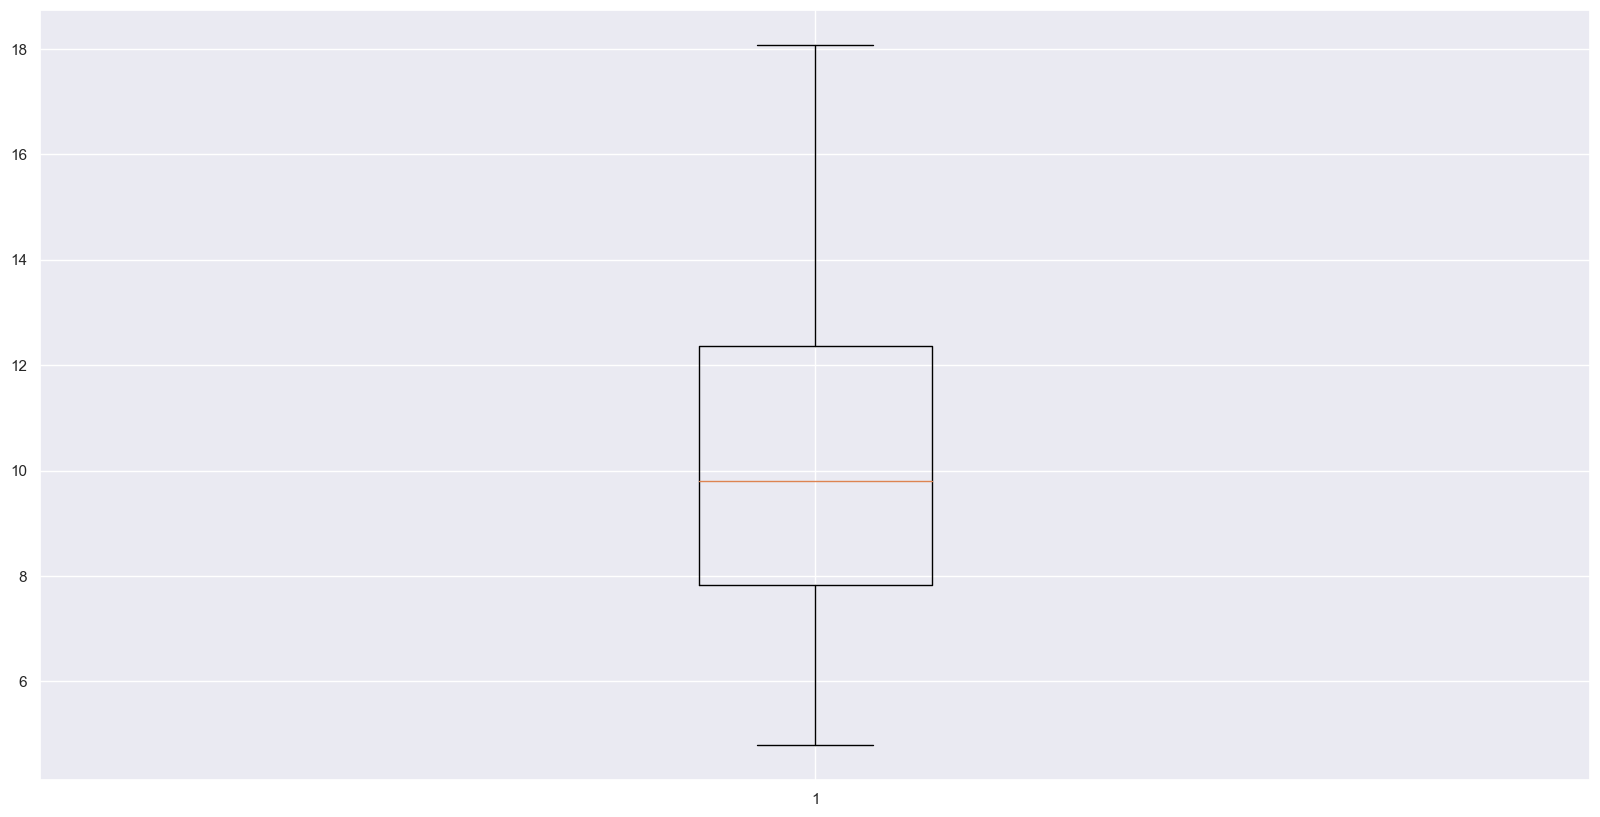

In [94]:
plt.boxplot(auto_df['city-L/100km'])
plt.show()

No outliers in the feature we want to predict

In [95]:
corr_matrix = auto_df.corr(numeric_only=True)

In [96]:
corr_matrix['city-L/100km'].sort_values()

city-mpg            -0.949713
highway-mpg         -0.930028
compression-ratio   -0.299372
diesel              -0.241282
height               0.003811
stroke               0.037300
symboling            0.066171
peak-rpm             0.115830
normalized-losses    0.238567
gas                  0.241282
wheel-base           0.476153
bore                 0.554610
length               0.657373
width                0.673363
engine-size          0.745059
curb-weight          0.785353
price                0.789898
horsepower           0.889488
city-L/100km         1.000000
Name: city-L/100km, dtype: float64

Highly correlated features => horsepower, price, curb-weight, engine-size  (|correlation|>0.7)

Now let's check are these features correlated among themselves also or not, so that we can drop few features.

In [97]:
corr_matrix[['horsepower','price','curb-weight','engine-size']]

,horsepower,price,curb-weight,engine-size
symboling,0.075819,-0.082391,-0.233118,-0.110581
normalized-losses,0.217299,0.133999,0.099404,0.112360
wheel-base,0.371147,0.584642,0.782097,0.572027
length,0.579821,0.690628,0.880665,0.685025
width,0.615077,0.751265,0.866201,0.729436
height,-0.087027,0.135486,0.307581,0.074694
curb-weight,0.757976,0.834415,1.000000,0.849072
engine-size,0.822676,0.872335,0.849072,1.000000
bore,0.566936,0.543155,0.644060,0.572609
stroke,0.098462,0.082310,0.167562,0.209523


Here it is visible that features 'engine-size' and 'price' are highly correlated to 'curb-weight' and 'horsepower'. So, we can only take **curb-weight** and **horsepower** as features for prediction till now.

Now let's check the categorical varriables also, as if the different classes of a particular feature are overlapping for same value of 'city-L/100km' feature, then it will not be a good predictor and if they are not overlapping then it will be a good predictor.
We will use box plot to see the overlap

In [98]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

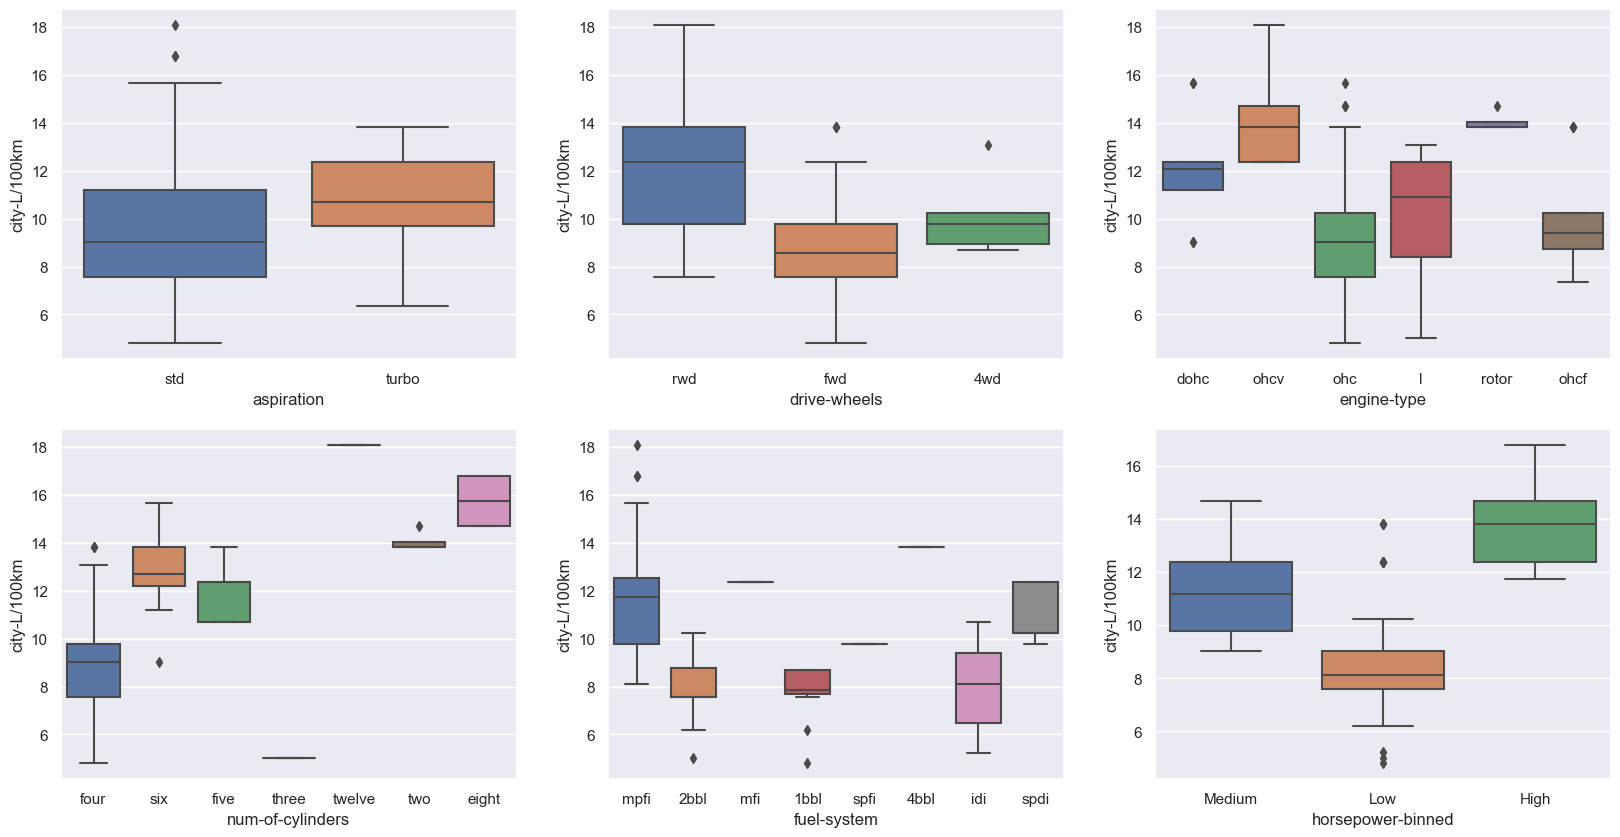

In [99]:

f, axes = plt.subplots(2, 3)

sns.set(rc={'figure.figsize':(20,10)})

sns.boxplot(x=auto_df['aspiration'], y=auto_df['city-L/100km'], ax=axes[0][0])
sns.boxplot(x=auto_df['drive-wheels'], y=auto_df['city-L/100km'], ax=axes[0][1])
sns.boxplot(x=auto_df['engine-type'], y=auto_df['city-L/100km'], ax=axes[0][2])
sns.boxplot(x=auto_df['num-of-cylinders'], y=auto_df['city-L/100km'], ax=axes[1][0])
sns.boxplot(x=auto_df['fuel-system'], y=auto_df['city-L/100km'], ax=axes[1][1])
sns.boxplot(x=auto_df['horsepower-binned'], y=auto_df['city-L/100km'], ax=axes[1][2])

plt.show()

As 'horsepower binned' feature is in direct correlation with 'horsepower' feature so we will ignore it, Rest we will take **'drive-wheels'**, **'num-of-cylinders'** and **'fuel system'** as our features for prediction becuase in these features overlapping is less than other categorical features.

So, finally we are taking 6 features => **'curb-weight', 'horsepower', 'drive-wheels', 'fuel-system', 'engine-type', 'num-of-cylinders**

Let's separate out our dataframe for prediction.

In [100]:
temp_data = auto_df[['curb-weight','horsepower','drive-wheels','engine-type','num-of-cylinders', 'fuel-system']]
temp_data

,curb-weight,horsepower,drive-wheels,engine-type,num-of-cylinders,fuel-system
0,2548,111.0,rwd,dohc,four,mpfi
1,2548,111.0,rwd,dohc,four,mpfi
2,2823,154.0,rwd,ohcv,six,mpfi
3,2337,102.0,fwd,ohc,four,mpfi
4,2824,115.0,4wd,ohc,five,mpfi
...,...,...,...,...,...,...
196,2952,114.0,rwd,ohc,four,mpfi
197,3049,160.0,rwd,ohc,four,mpfi
198,3012,134.0,rwd,ohcv,six,mpfi
199,3217,106.0,rwd,ohc,six,idi


But now we also need to hot encode our categorical features. Let's do that also.

In [101]:
inputs = pd.get_dummies(temp_data, columns = ['drive-wheels','engine-type','num-of-cylinders','fuel-system'])
inputs

,curb-weight,horsepower,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2548,111.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2548,111.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2823,154.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2337,102.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2824,115.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2952,114.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
197,3049,160.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
198,3012,134.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
199,3217,106.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## 2. Visualise/Plot the regression model

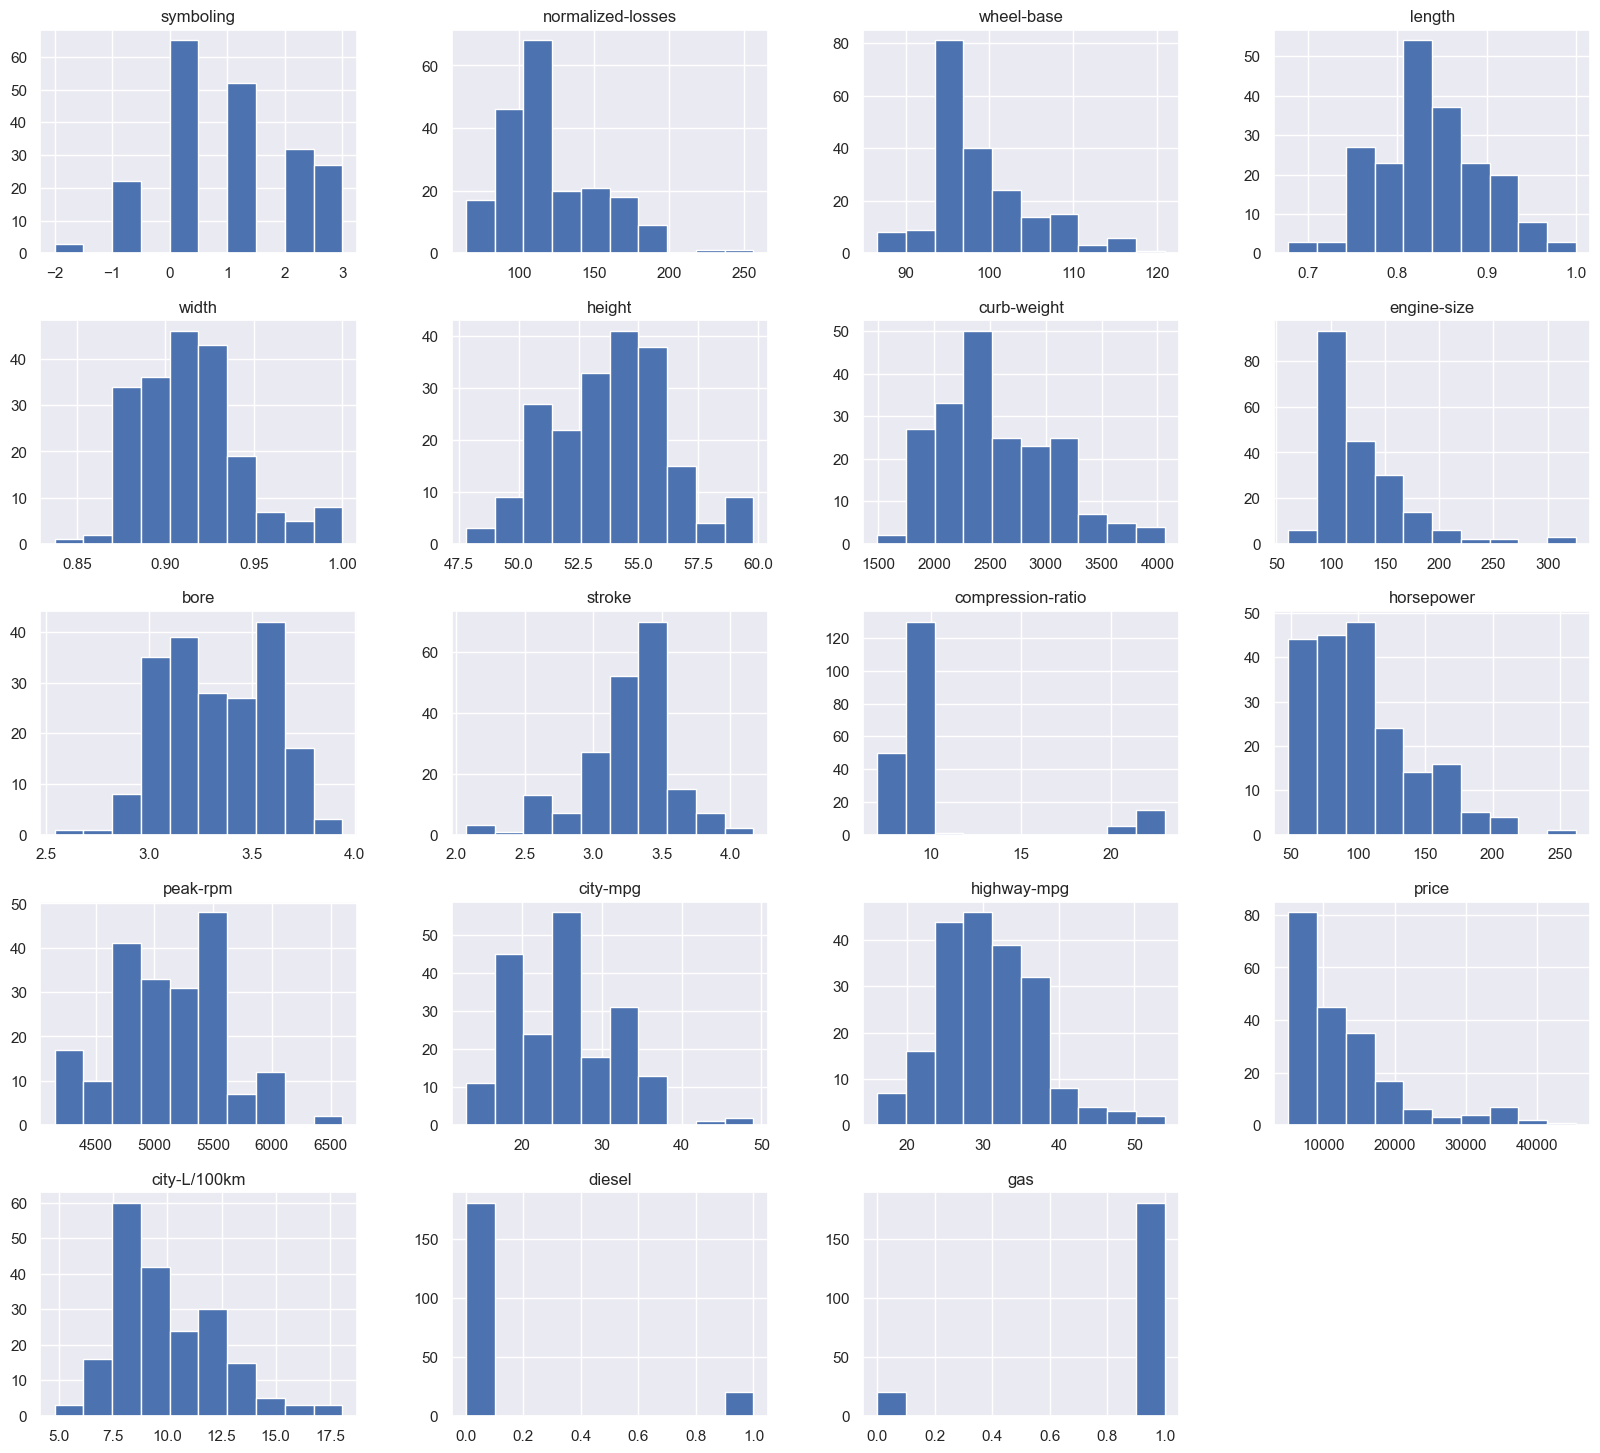

In [102]:
auto_df.hist(figsize=(20,18))
plt.show()

## 3. Generate a Linear Regression equation

In [103]:
reg = LinearRegression()
reg.fit(inputs,auto_df['city-L/100km'])

LinearRegression()

## 4. Use a residual plot to inspect if LR fits the model

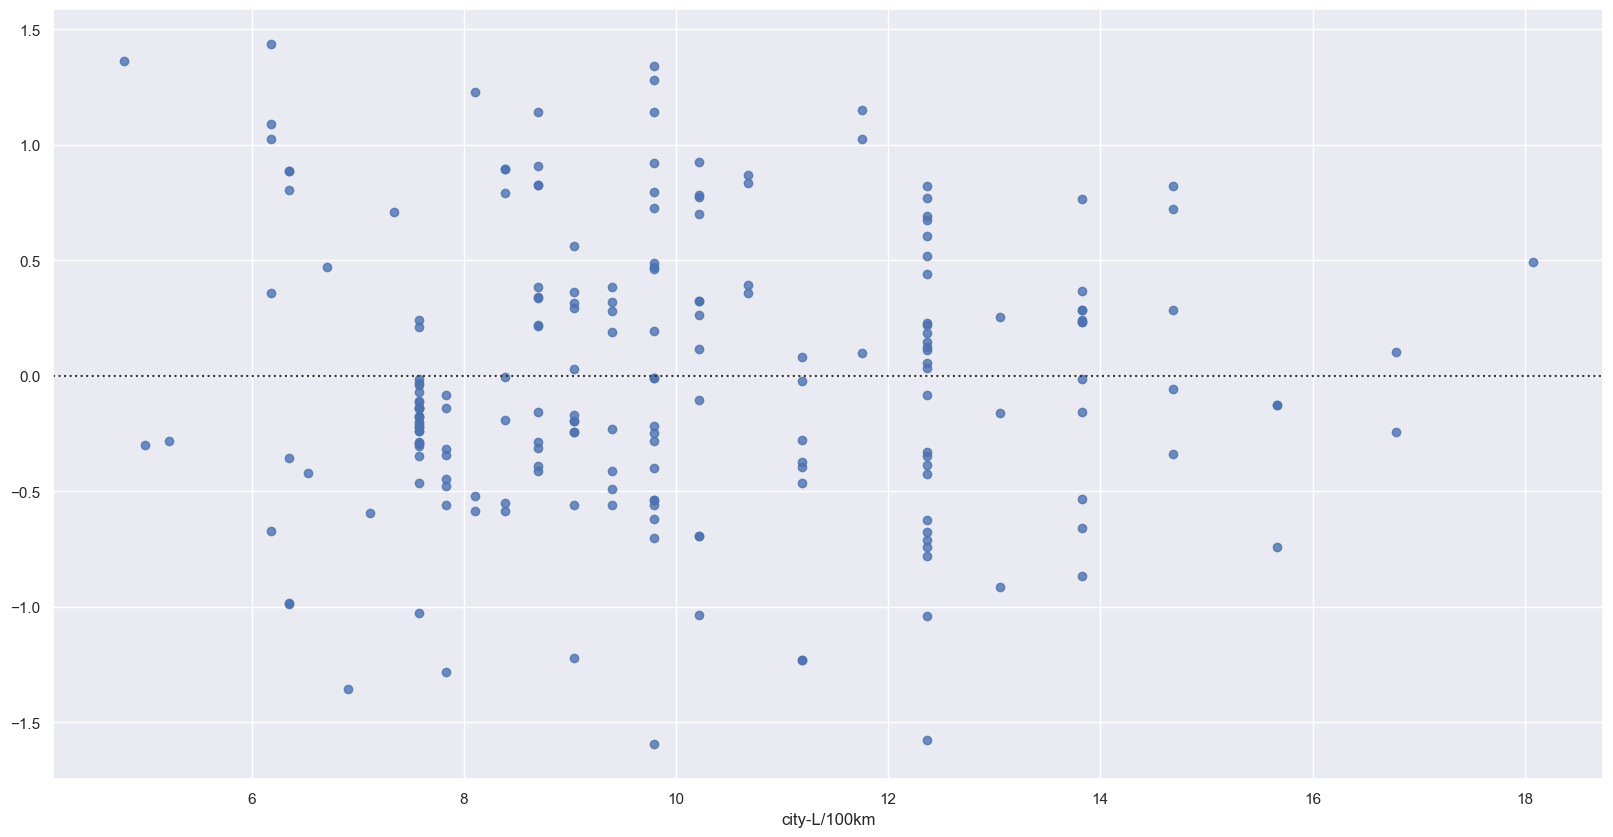

In [104]:
predicted_data = reg.predict(inputs)
sns.residplot(y = predicted_data, x = auto_df['city-L/100km'])
plt.show()

In [105]:
residuals = predicted_data - auto_df['city-L/100km']
print('residuals above zero = {} and residuals below zero = {}'.format(residuals[residuals>=0].shape[0],residuals[residuals<0].shape[0]))

residuals above zero = 92 and residuals below zero = 109


**From the results of residual plot it is visible that regression fits the data well.**

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(auto_df['city-L/100km'],predicted_data) 
r2 = r2_score(auto_df['city-L/100km'],predicted_data) * 100
print('R2 score (Accuracy) = {}% and MSE = {}'.format(r2,mse))

R2 score (Accuracy) = 93.9520962086411% and MSE = 0.3865960568306008


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [107]:
# use -  sklearn.datasets.load_iris
from sklearn.datasets import load_iris
iris_data = load_iris()

iris_df = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [108]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 is Iris Setosa, 1 is Iris Versicolour, 2 is Iris Virginica

## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [109]:
iris_df['target'] = iris_df['target'].replace({0 : 1})

Now setosa and versicolor classes are merged (let's say any new class) and marked as '1', while virginica class is marked as '2'.

In [110]:
iris_df['target'].value_counts()

1    100
2     50
Name: target, dtype: int64

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [111]:
iris_input = iris_df.drop(['target'], axis = 1)
iris_output = iris_df['target']

In [112]:
# from sklearn.model_selection import train_test_split

i_x_train, i_x_test, i_y_train, i_y_test = train_test_split(iris_input, iris_output, train_size=0.8, random_state=42)

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [113]:
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression()

#fit the model on the training data
model.fit(i_x_train, i_y_train)

i_y_pred = model.predict(i_x_test)

# accuracy of the model
model.score(i_x_test, i_y_test)

1.0

## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [114]:
from sklearn.model_selection import StratifiedShuffleSplit 

splitter = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2) 

for train,test in splitter.split(iris_input,iris_output):
    x_strat_train = iris_input.iloc[train]
    x_strat_test = iris_input.iloc[test]
    y_strat_train = iris_output.iloc[train]
    y_strat_test = iris_output.iloc[test]

print(y_strat_train.value_counts())
print(y_strat_test.value_counts())

1    80
2    40
Name: target, dtype: int64
1    20
2    10
Name: target, dtype: int64


**In the above code, I did stratified sampling on ***'target'*** variable. Since in target variable there are two classes '1' and '2' and we want that our train and test data must contain equal proportion of both of these classes so that our model predicts well.** 

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [115]:
#create the model instance
model = LogisticRegression()

#fit the model on the training data
model.fit(x_strat_train, y_strat_train)

i_y_pred = model.predict(x_strat_test)

# accuracy of the model
model.score(x_strat_test, y_strat_test)

1.0

In [116]:
print(i_y_train.value_counts())
print(i_y_test.value_counts())

1    81
2    39
Name: target, dtype: int64
1    19
2    11
Name: target, dtype: int64


In [117]:
print(y_strat_train.value_counts())
print(y_strat_test.value_counts())

1    80
2    40
Name: target, dtype: int64
1    20
2    10
Name: target, dtype: int64


***Ratio before stratified sampling => 19 : 11 (test data) and Ratio after stratified sampoling => 20 : 10 (test data)***

**There is no change in the accuracy from random sampling to stratified sampling, it is because the proportion of classes in both train and test data is equal even before doing stratified smapling, that's why stratified sampling doesn't change anything.**